In [1]:
#provide a recommaondation based on similarities in the movie data

In [2]:
#Import relevant libraries
import pandas as pd
import numpy as np

In [22]:
#Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
%matplotlib inline

In [3]:
#Define the column names
column_names=['user_id','item_id','ratings','time_stamp']

In [5]:
#Import the data as data frame
df=pd.read_csv(r'D:\Study\Machine_Learning\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\u.data',sep='\t',names=column_names)

In [6]:
#Descriptive Statistics

In [7]:
#Get the view of first ten rows
df.head(10)

,user_id,item_id,ratings,time_stamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [8]:
#GEt the details about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id       100003 non-null int64
item_id       100003 non-null int64
ratings       100003 non-null int64
time_stamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [9]:
#Get the summary Statistics
df.describe()

,user_id,item_id,ratings,time_stamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [18]:
#Import the movie titles datasets
movie_titles=pd.read_csv(r'D:\Study\Machine_Learning\Refactored_Py_DS_ML_Bootcamp-master\19-Recommender-Systems\Movie_Id_Titles')

In [19]:
movie_titles.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [20]:
#Merged both df and movie titles data frame
df_merged=pd.merge(df,movie_titles,on='item_id')

In [21]:
df_merged.head(10)

,user_id,item_id,ratings,time_stamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
5,274,50,5,878944679,Star Wars (1977)
6,227,50,4,879035347,Star Wars (1977)
7,99,50,5,885679998,Star Wars (1977)
8,305,50,5,886321799,Star Wars (1977)
9,108,50,4,879879739,Star Wars (1977)


In [24]:
sns.set_style('white')

In [28]:
#Get the mean rating value for every title, sort the values and get the descending order list
df_merged.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: ratings, dtype: float64

In [29]:
#Get the count of rating value for every title, sort the values and get the descending order list
df_merged.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [30]:
#create a new data frame using group by data in title
ratings=pd.DataFrame(df_merged.groupby('title')['ratings'].mean())

In [32]:
ratings.head(10)#ratings-how many people rated it.

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [33]:
#add new column to this data frame
ratings['Number of ratings']=pd.DataFrame(df_merged.groupby('title')['ratings'].count())

In [34]:
ratings.head(10)

,ratings,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


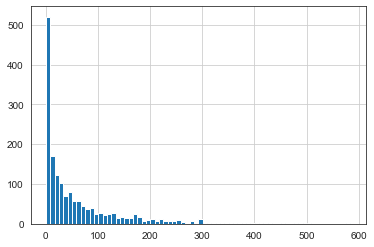

In [35]:
#visualize Number of ratings in histogram
ratings['Number of ratings'].hist(bins=70)
plt.show()

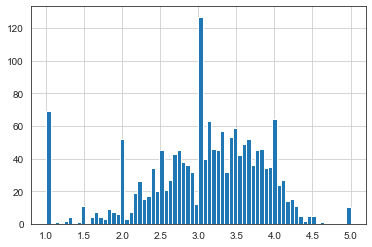

In [37]:
##visualize ratings in histogram
ratings['ratings'].hist(bins=70)
plt.show()

In [38]:
#There are some outliers as 1,1.3 and 5. peak is 3.

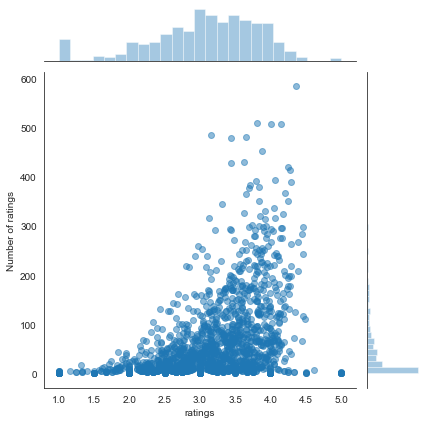

In [41]:
#visualize the relationship between avaerage ratings and number of ratings
sns.jointplot(x=ratings['ratings'],y=ratings['Number of ratings'],data=ratings,alpha=0.5)
plt.show()

In [42]:
#create a recommonder system based on data

In [45]:
#Create a matrix user id and title. This has been done by craeting pivot table
df_moviemat=df_merged.pivot_table(index='user_id',columns='title',values='ratings')

In [46]:
df_moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Get the sort out values according to the ratings
ratings.sort_values('Number of ratings',ascending=False).head(10)

,ratings,Number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [51]:
#Get the user ratings of Star Wars and Liar Liar  from pivot table
StarWars_user_ratings=df_moviemat['Star Wars (1977)']
LiarLiar_user_ratings=df_moviemat['Liar Liar (1997)']

In [54]:
#Get the values of each catergory
StarWars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [55]:
LiarLiar_user_ratings.head(10)

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
6    2.0
7    1.0
8    3.0
9    4.0
Name: Liar Liar (1997), dtype: float64

In [56]:
#corrwith-find pairwise correlation between rows or columns in two data frames
#corr- find correlation between two data series

In [57]:
#Find the correlation of Star Wars with other films
similar_to_StarWars=df_moviemat.corrwith(StarWars_user_ratings)

C:\Users\lochanie\.conda\envs\pythonpract\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\lochanie\.conda\envs\pythonpract\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [58]:
similar_to_StarWars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [59]:
#Find the correlation of Liar Liar with other films
similar_to_Liar_Liar=df_moviemat.corrwith(LiarLiar_user_ratings)

In [60]:
similar_to_Liar_Liar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [64]:
#Create a dataframe using correlation values with Start Wars
corr_StarWars=pd.DataFrame(similar_to_StarWars,columns=['correlation'])
corr_StarWars.dropna(inplace=True)

In [66]:
corr_StarWars.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [67]:
#Create a dataframe using correlation values with Liar Liar
corr_Liar_Liar=pd.DataFrame(similar_to_Liar_Liar,columns=['correlation'])
corr_Liar_Liar.dropna(inplace=True)

In [68]:
corr_Liar_Liar.head(10)

,correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
"39 Steps, The (1935)",0.400918
8 1/2 (1963),0.178064


In [70]:
#Sort out the correlation values of corr_StarWars
corr_StarWars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [72]:
#The given data has fully correlated with each film.This is beacause noof ratings are low. 
#Therefore , keep a threshold value for number of ratings to fit a model.

In [73]:
#Filter up movies that higher than one hundred reviews
corr_StarWars=corr_StarWars.join(ratings['Number of ratings'])

In [74]:
corr_StarWars.head(10)

,correlation,Number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [75]:
corr_StarWars[corr_StarWars['Number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,Number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [76]:
#Follow same steps to liar Liar film

In [77]:
corr_Liar_Liar=corr_Liar_Liar.join(ratings['Number of ratings']).head(10)

In [78]:
corr_Liar_Liar

,correlation,Number of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59
8 1/2 (1963),0.178064,38


In [79]:
corr_Liar_Liar[corr_Liar_Liar['Number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,Number of ratings
title,,
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
2001: A Space Odyssey (1968),-0.057864,259


In [80]:
#Change the threshold level of number of ratings and check whether there is higher correlation between films rather than this